Exploratory draft sheet for data analysis and feature engineering


In [2]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Importing the dataset


In [4]:
dFrame = pd.read_csv("your_data.csv", index_col=0)

Viewing the dataset read to have insight about the features given


In [5]:
print(dFrame.columns)


Index(['eyesight(left)', 'height(cm)', 'hemoglobin', 'HDL', 'serum creatinine',
       'hearing(left)', 'waist(cm)', 'fasting blood sugar', 'id',
       'eyesight(right)', 'smoking'],
      dtype='object')


In [6]:
print(dFrame.shape)

(159256, 11)


In [7]:
print(dFrame.describe())

       eyesight(left)     height(cm)     hemoglobin            HDL  \
count   159256.000000  159256.000000  159256.000000  159256.000000   
mean         1.005798     165.266929      14.796965      55.852684   
std          0.402113       8.818970       1.431213      13.964141   
min          0.100000     135.000000       4.900000       9.000000   
25%          0.800000     160.000000      13.800000      45.000000   
50%          1.000000     165.000000      15.000000      54.000000   
75%          1.200000     170.000000      15.800000      64.000000   
max          9.900000     190.000000      21.000000     136.000000   

       serum creatinine  hearing(left)      waist(cm)  fasting blood sugar  \
count     159256.000000  159256.000000  159256.000000        159256.000000   
mean           0.892764       1.023974      83.001990            98.352552   
std            0.179346       0.152969       8.957937            15.329740   
min            0.100000       1.000000      51.000000    

After reviewing the data shape and columns

### Observations

1. 10 features 1 label(smoking)
2. potentially (id) column will be dropout and have nothing to do with our classification
3. data are all numeric no categorical


### Univariate analysis


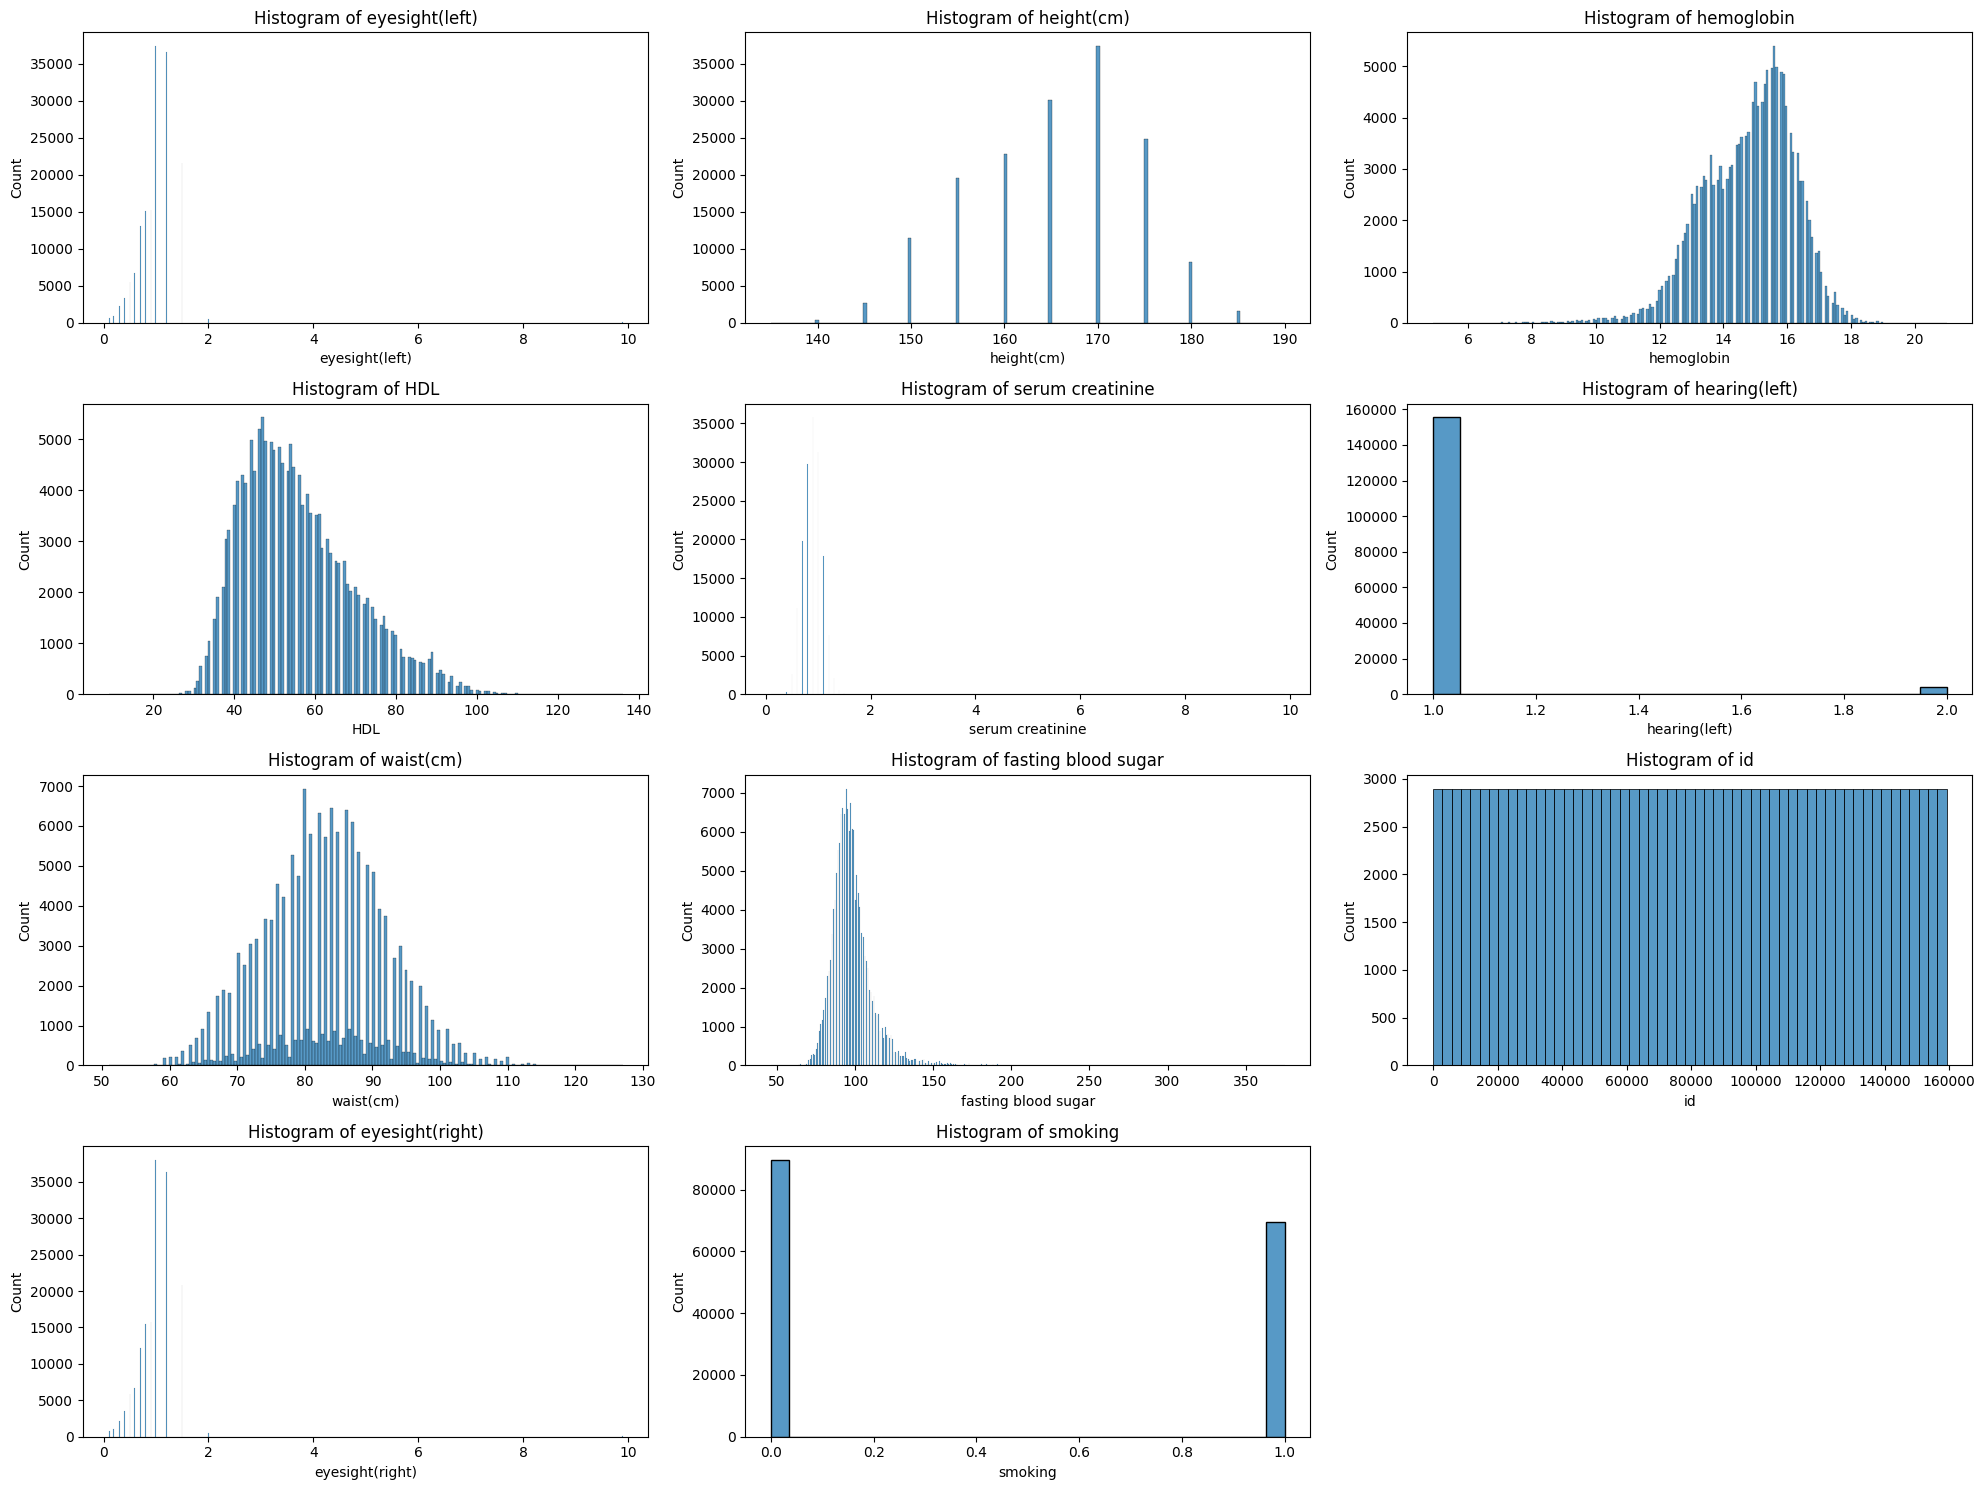

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()
for i in range(11) :
    col = dFrame.columns[i]
    sns.histplot(dFrame[col], ax =axes[i])
    axes[i].set_title(f"Histogram of {col}")
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Bivariate analysis


### Boxplot of features vs smoking

### objective: to see the distribution of the features with respect to the smoking label


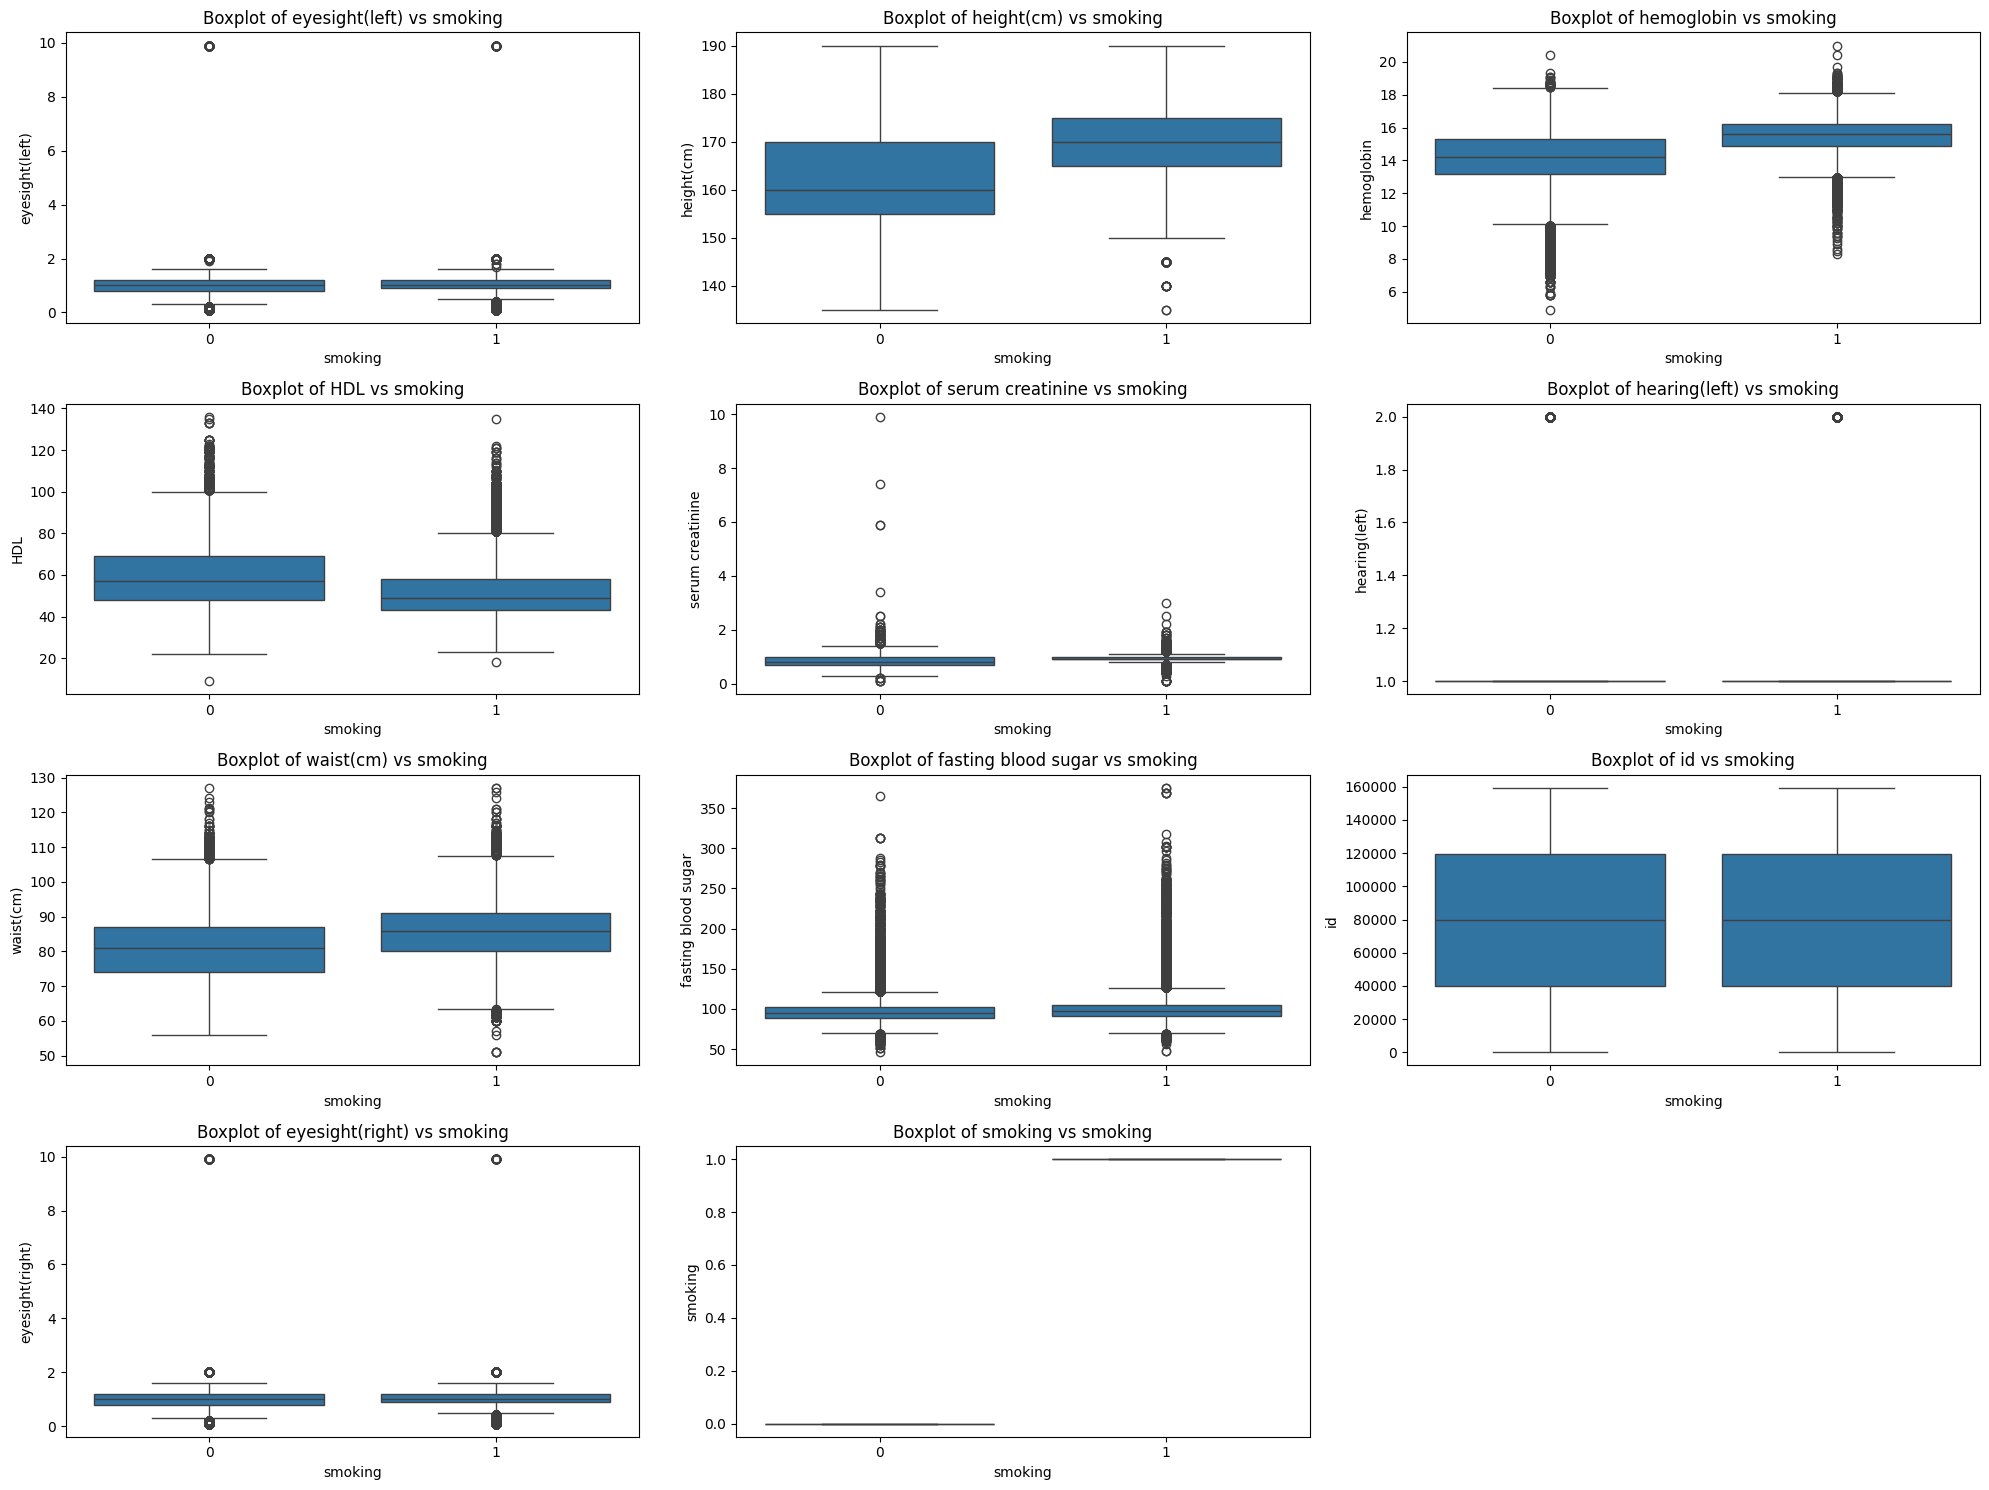

In [9]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()
for i in range(11) :
    col = dFrame.columns[i]
    sns.boxplot(x=dFrame['smoking'], y=dFrame[col], ax =axes[i])
    axes[i].set_title(f"Boxplot of {col} vs smoking")
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Observations

1. The distribution of the features with respect to the smoking label is not clear
2. The features have alot of outliers
3. most of the features are not skewed
4. The features have different scales
5. eyesight(left), eyesight (right) , fasting blood sugar and serum creatinine have short variability


### Correlation matrix


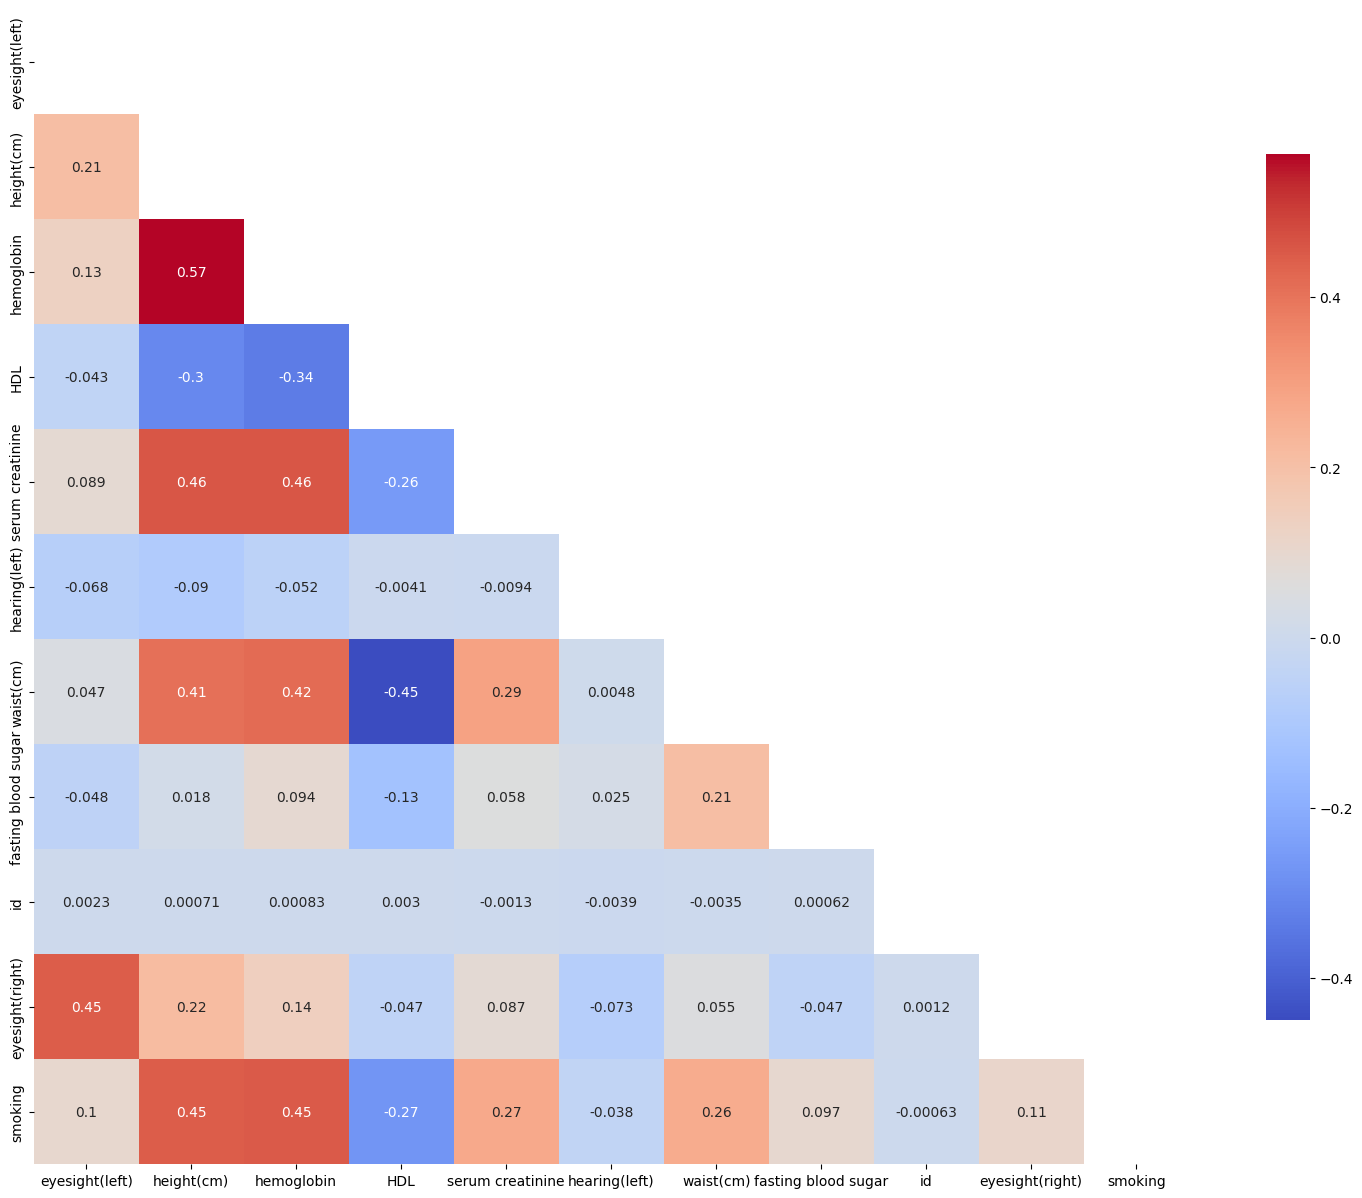

In [10]:
corr = dFrame.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .75})
plt.show()

### Adding pairplot to see the relationship between the features


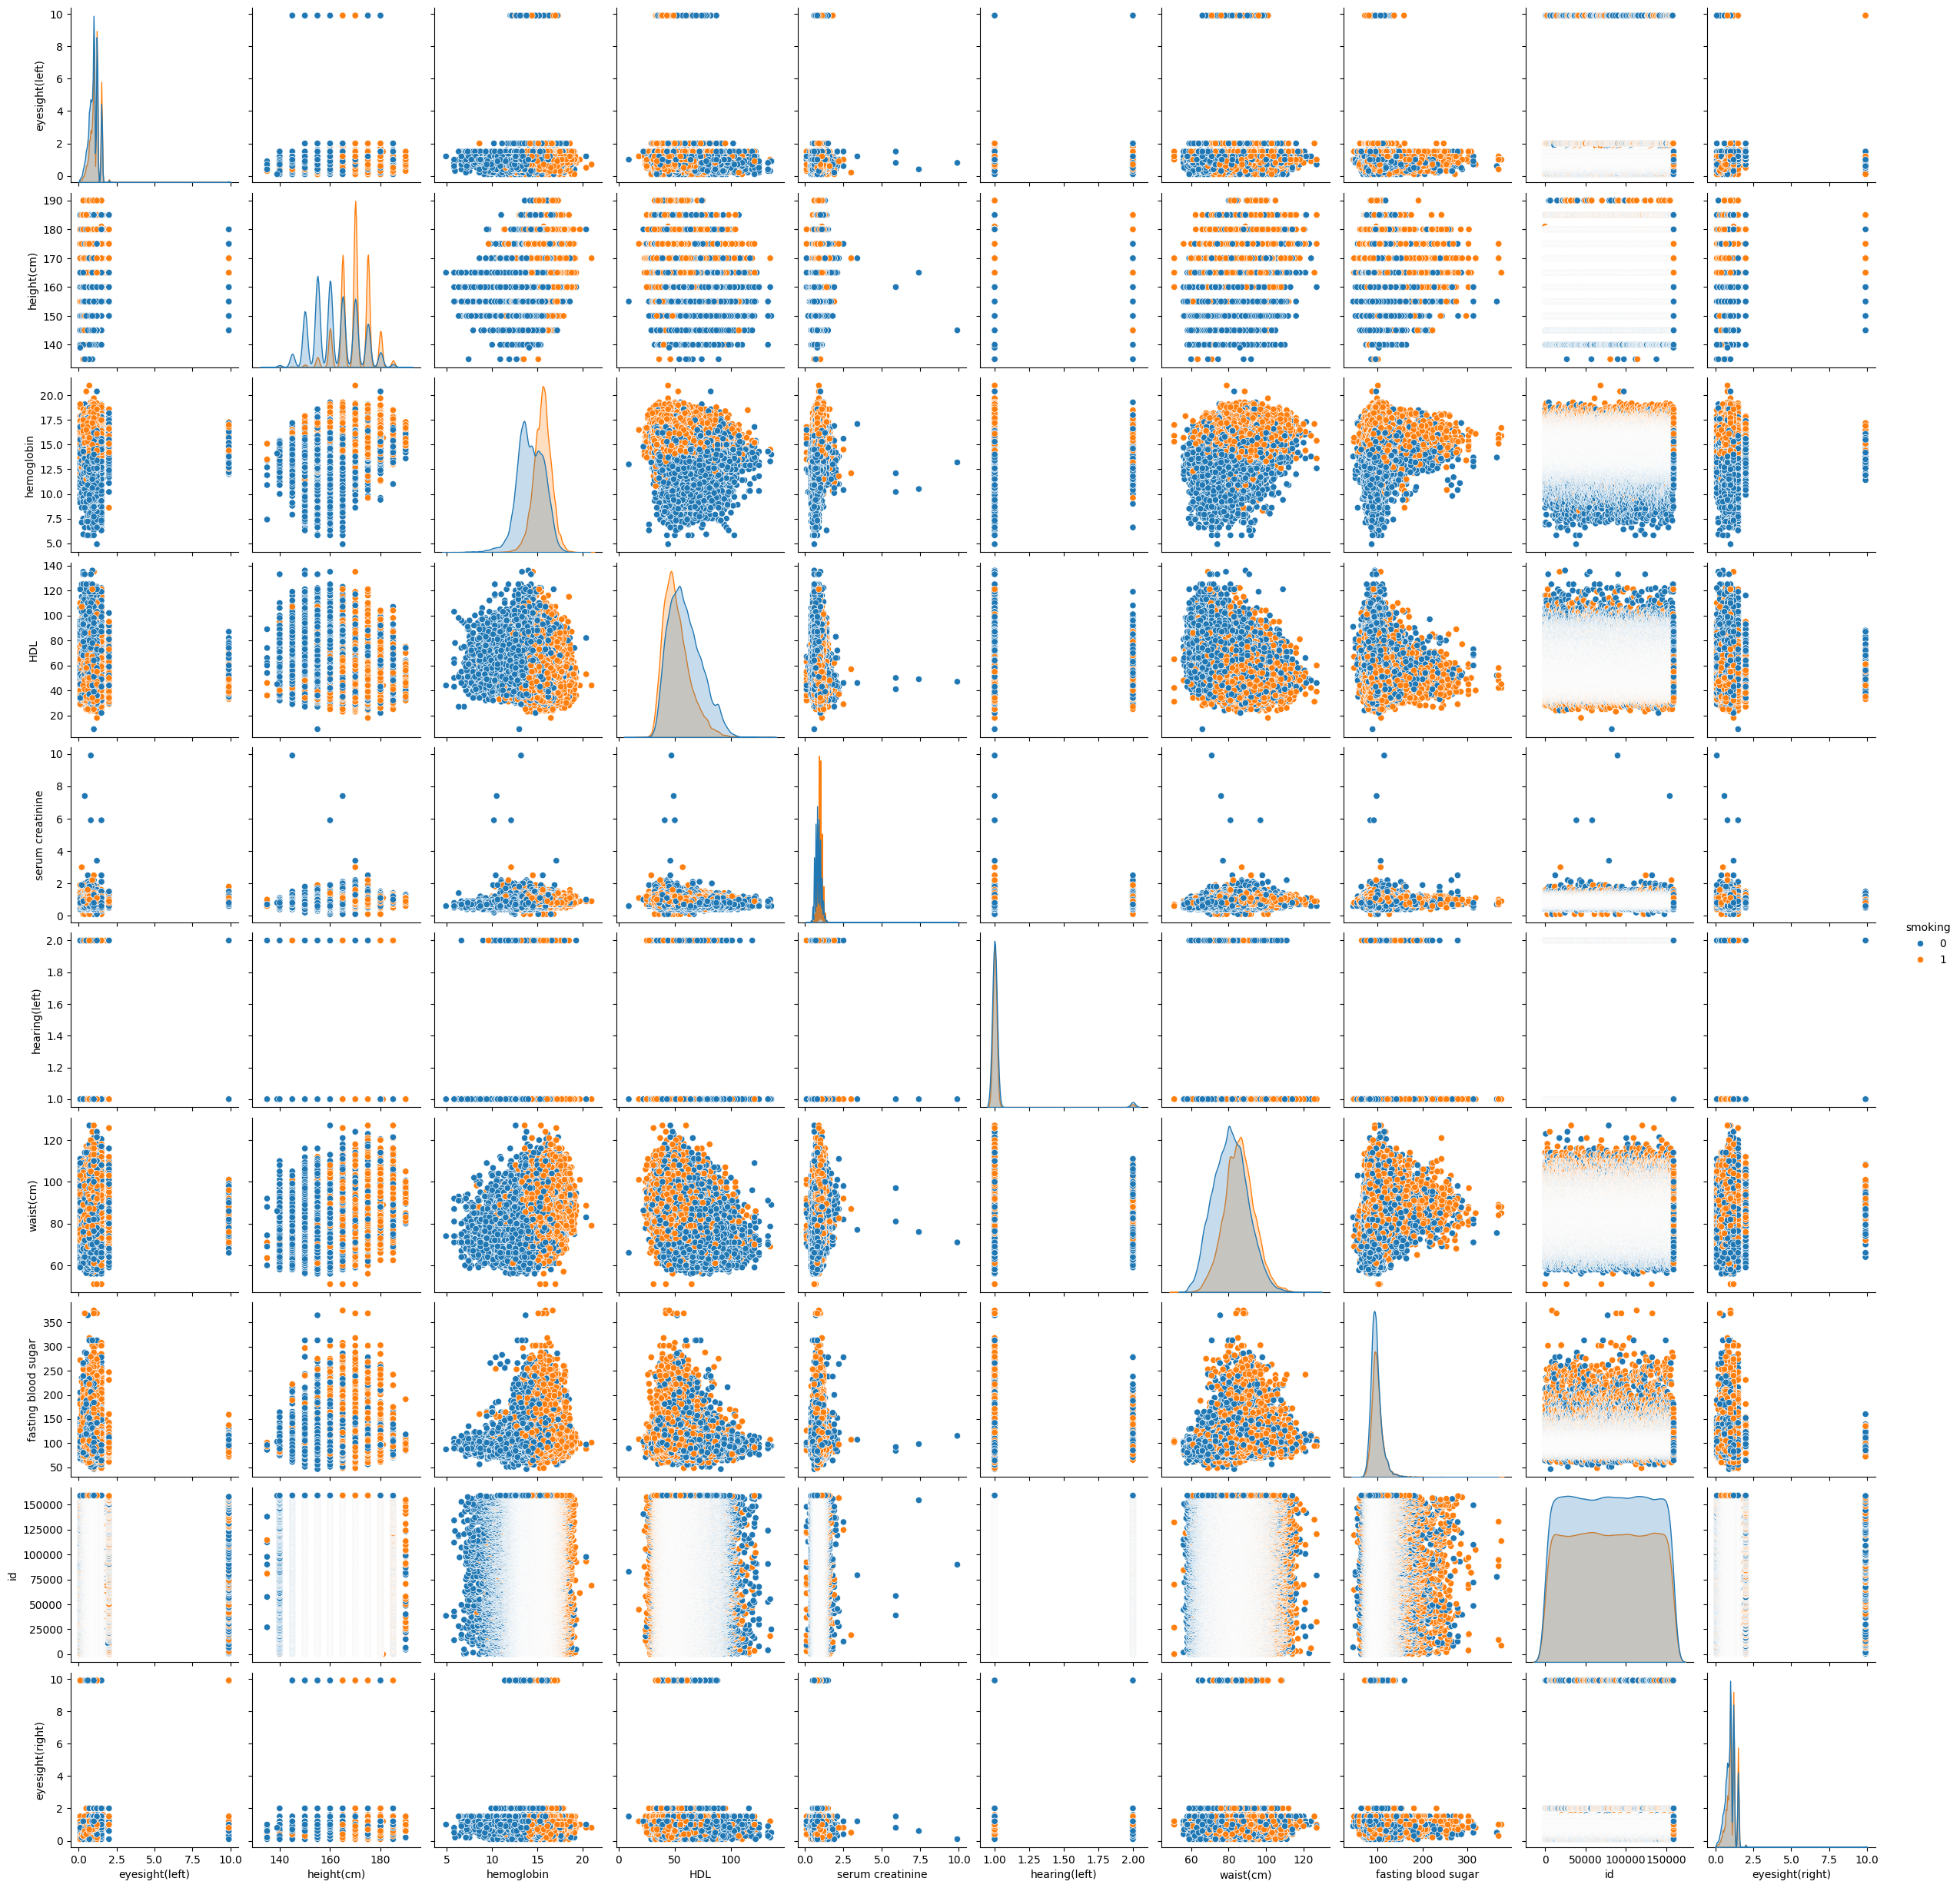

In [11]:
sns.pairplot(dFrame, hue='smoking')
plt.show() 